### Tugas Kecerdasan Buatan
Dataset: https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset

1. Muhammad Iqbal Baihaqi
2. Muhammad Jati

In [1]:
#import dependencies
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, hamming_loss, jaccard_score, f1_score, accuracy_score
from imblearn.pipeline import Pipeline as ImbPipeline
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
#import dataset from the UCI repository


# fetch dataset 
ai4i_2020_predictive_maintenance_dataset = fetch_ucirepo(id=601) 

# data (as pandas dataframes) 
X = ai4i_2020_predictive_maintenance_dataset.data.features 
y = ai4i_2020_predictive_maintenance_dataset.data.targets 

# metadata 
print(ai4i_2020_predictive_maintenance_dataset.metadata) 

# variable information 
print(ai4i_2020_predictive_maintenance_dataset.variables) 


{'uci_id': 601, 'name': 'AI4I 2020 Predictive Maintenance Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/601/ai4i+2020+predictive+maintenance+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/601/data.csv', 'abstract': 'The AI4I 2020 Predictive Maintenance Dataset is a synthetic dataset that reflects real predictive maintenance data encountered in industry.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression', 'Causal-Discovery'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 10000, 'num_features': 6, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], 'index_col': ['UID', 'Product ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C5HS5C', 'creators': [], 'intro_paper': {'ID': 386, 'type': 'NATIVE', 'title': 'Explainable Artificial Intelligen

In [3]:
#cek apakah ini multilabel dataset


# List kolom kegagalan
failure_modes = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']

# Mencari sampel dengan lebih dari satu kegagalan
y['multiple_failures'] = y[failure_modes].sum(axis=1)
multiple_failures_df = y[y['multiple_failures'] > 1]

# Menampilkan jumlah sampel dengan multiple failures
print("Jumlah sampel dengan lebih dari satu kegagalan:", multiple_failures_df.shape[0])

# Menampilkan sampel-sampel tersebut
print(multiple_failures_df.head())  # Menampilkan beberapa baris pertama dari sampel yang memiliki multiple failures


Jumlah sampel dengan lebih dari satu kegagalan: 24
      Machine failure  TWF  HDF  PWF  OSF  RNF  multiple_failures
69                  1    0    0    1    1    0                  2
1324                1    0    0    1    1    0                  2
1496                1    0    0    1    1    0                  2
3611                1    1    0    0    0    1                  2
3854                1    0    0    1    1    0                  2


C:\Users\asus\AppData\Local\Temp\ipykernel_12684\3087246608.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['multiple_failures'] = y[failure_modes].sum(axis=1)


### Tampilkan Data

In [4]:
X

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
0,M,298.1,308.6,1551,42.8,0
1,L,298.2,308.7,1408,46.3,3
2,L,298.1,308.5,1498,49.4,5
3,L,298.2,308.6,1433,39.5,7
4,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14
9996,H,298.9,308.4,1632,31.8,17
9997,M,299.0,308.6,1645,33.4,22
9998,H,299.0,308.7,1408,48.5,25


In [5]:
y

,Machine failure,TWF,HDF,PWF,OSF,RNF,multiple_failures
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0


In [6]:
print(y['Machine failure'].value_counts())
print(y['TWF'].value_counts())
print(y['HDF'].value_counts())
print(y['PWF'].value_counts())
print(y['OSF'].value_counts())
print(y['RNF'].value_counts())
print(y['multiple_failures'].value_counts())

Machine failure
0    9661
1     339
Name: count, dtype: int64
TWF
0    9954
1      46
Name: count, dtype: int64
HDF
0    9885
1     115
Name: count, dtype: int64
PWF
0    9905
1      95
Name: count, dtype: int64
OSF
0    9902
1      98
Name: count, dtype: int64
RNF
0    9981
1      19
Name: count, dtype: int64
multiple_failures
0    9652
1     324
2      23
3       1
Name: count, dtype: int64


### Preprocess Data

Kode ini mengubah kolom kategorikal Type menjadi format numerik yang dapat digunakan oleh model machine learning.

In [7]:
# Mengubah kolom 'Type' menjadi tiga kolom terpisah
X_dummies = pd.get_dummies(X, columns=['Type'], prefix='', prefix_sep='')

X_dummies[['H', 'L', 'M']] = X_dummies[['H', 'L', 'M']].astype(int)
X_dummies

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,H,L,M
0,298.1,308.6,1551,42.8,0,0,0,1
1,298.2,308.7,1408,46.3,3,0,1,0
2,298.1,308.5,1498,49.4,5,0,1,0
3,298.2,308.6,1433,39.5,7,0,1,0
4,298.2,308.7,1408,40.0,9,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,0,1
9996,298.9,308.4,1632,31.8,17,1,0,0
9997,299.0,308.6,1645,33.4,22,0,0,1
9998,299.0,308.7,1408,48.5,25,1,0,0


### Exploratory Data Analysis

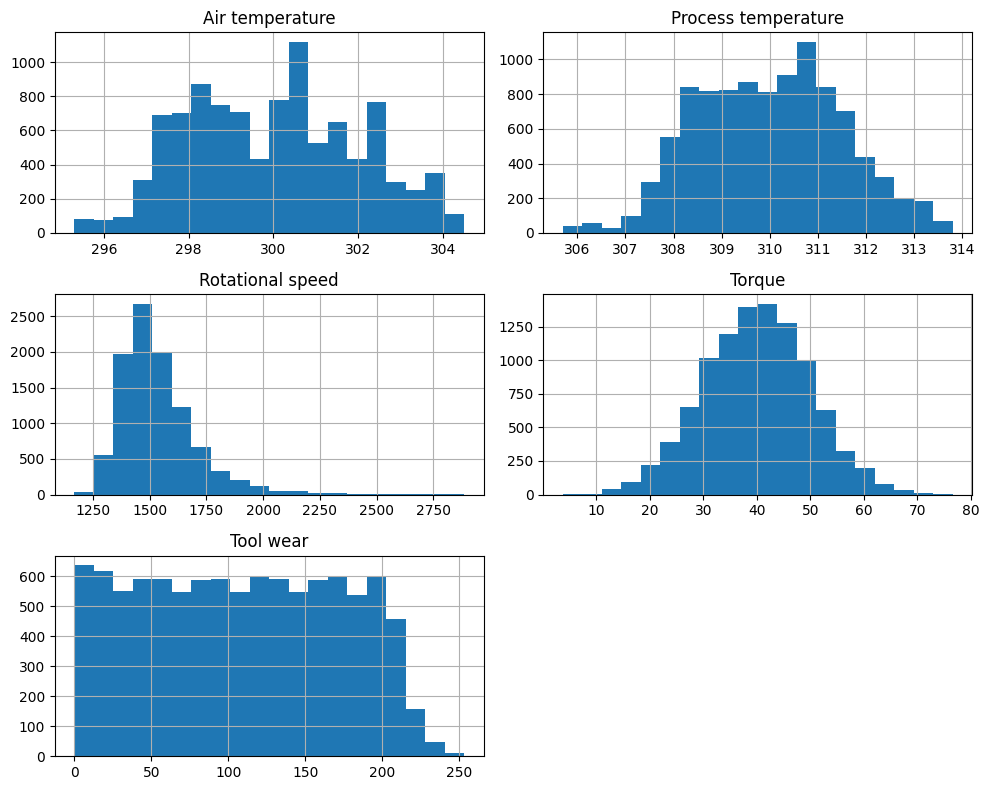

In [8]:
X_dummies.iloc[:, :5].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

### Tugas ML-nya adalah 
1. Memprediksi apakah terjadi kegagalan mesin atau tidak (binary classification)
2. Jika gagal, mode kegagalan apa yang terjadi (multilabel classification)
###

In [8]:
y_mf = y[['Machine failure']]
y_mf

,Machine failure
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


### Binary Classification
## XGBoost

In [139]:


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_dummies, y_mf, test_size=0.2, stratify=y_mf, random_state=42)



In [150]:
def evaluate_model_with_pr_curve(scale_pos_weight, learning_rate, max_depth, X_train, y_train, X_test, y_test):
    # Define the pipeline
    pipeline = ImbPipeline(steps=[
        ('classifier', xgb.XGBClassifier(
            objective='binary:logistic',
            scale_pos_weight=scale_pos_weight,
            learning_rate=learning_rate,
            max_depth=max_depth,
            eval_metric='aucpr',
            random_state=42
        ))
    ])

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Predict probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]


    # Compute Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
    
    # Find the top-right corner of the PR curve
    top_right_index = max(range(len(precision)), key=lambda i: (recall[i] * precision[i]))

    # Extract the corresponding values
    optimal_precision = precision[top_right_index]
    optimal_recall = recall[top_right_index]
    optimal_threshold = thresholds[top_right_index]

    print(f"Optimal Precision: {optimal_precision}")
    print(f"Optimal Recall: {optimal_recall}")
    print(f"Optimal Threshold: {optimal_threshold}")

    
    y_pred_adjusted = (y_proba >= optimal_threshold).astype(int)
    print("Classification Report with Optimal Threshold:")
    print(classification_report(y_test, y_pred_adjusted))

    # Compute AUC-PR
    auc_pr = auc(recall, precision)
    print(f"AUC-PR: {auc_pr:.2f}")

    # Plot the PR Curve
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f'PR Curve (AUC = {auc_pr:.2f})')
    plt.scatter(optimal_recall, optimal_precision, color='red', label='Optimal Point')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc='best')
    plt.grid(alpha=0.6)
    plt.show()

    return {
        'optimal_precision': optimal_precision,
        'optimal_recall': optimal_recall,
        'optimal_threshold': optimal_threshold,
        'auc_pr': auc_pr
    }


### Cell Optimasi 

[I 2024-12-12 00:02:31,959] A new study created in memory with name: no-name-48121132-808f-4d7a-b257-21e5220898ef
[I 2024-12-12 00:02:32,281] Trial 0 finished with value: 0.8480880507168451 and parameters: {'scale_pos_weight': 0.1749080237694725, 'learning_rate': 0.19328294024559517, 'max_depth': 6}. Best is trial 0 with value: 0.8480880507168451.
[I 2024-12-12 00:02:32,350] Trial 1 finished with value: 0.702433428720168 and parameters: {'scale_pos_weight': 0.2197316968394073, 'learning_rate': 0.11142080469295271, 'max_depth': 2}. Best is trial 0 with value: 0.8480880507168451.
[I 2024-12-12 00:02:32,441] Trial 2 finished with value: 0.8326971365277778 and parameters: {'scale_pos_weight': 0.1116167224336399, 'learning_rate': 0.18228251054233668, 'max_depth': 5}. Best is trial 0 with value: 0.8480880507168451.
[I 2024-12-12 00:02:32,677] Trial 3 finished with value: 0.840460011914432 and parameters: {'scale_pos_weight': 0.2416145155592091, 'learning_rate': 0.10143703591411897, 'max_dept

Best parameters: {'scale_pos_weight': 0.2913110203336672, 'learning_rate': 0.1492972436684934, 'max_depth': 4}
Best AUC-PR: 0.8594
Optimal Precision: 0.8833333333333333
Optimal Recall: 0.7794117647058824
Optimal Threshold: 0.2011202871799469
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.88      0.78      0.83        68

    accuracy                           0.99      2000
   macro avg       0.94      0.89      0.91      2000
weighted avg       0.99      0.99      0.99      2000

AUC-PR: 0.86


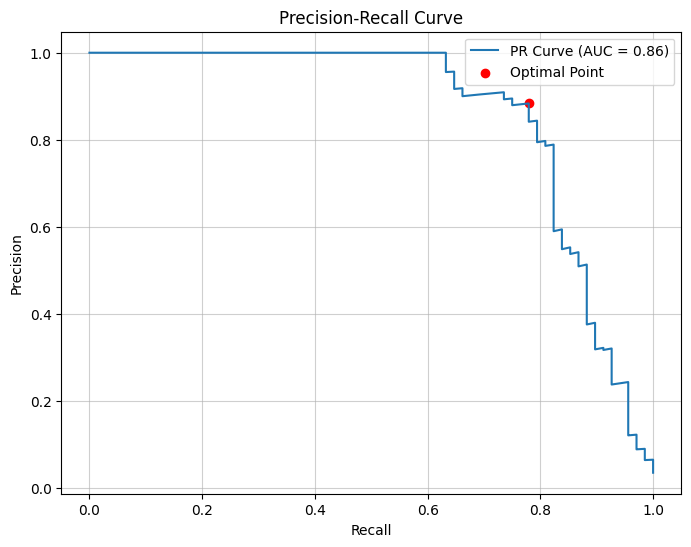

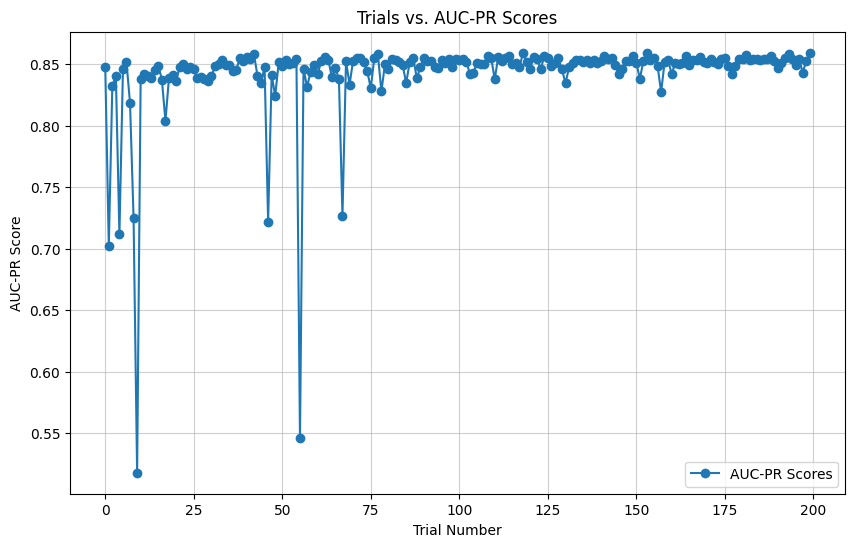

Final AUC-PR: 0.8594
Optimal Precision: 0.8833333333333333
Optimal Recall: 0.7794117647058824
Optimal Threshold: 0.2011202871799469


In [152]:


def optimize_model(trial):
    # Suggest hyperparameters for XGBoost
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 0.1, 0.3)
    learning_rate = trial.suggest_float('learning_rate', 0.1, 0.2, log=True)
    max_depth = trial.suggest_int('max_depth', 1, 8)
    
    # Define the pipeline
    pipeline = ImbPipeline(steps=[
        ('classifier', xgb.XGBClassifier(
            objective='binary:logistic',
            scale_pos_weight=scale_pos_weight,
            learning_rate=learning_rate,
            max_depth=max_depth,
            eval_metric='aucpr',
            random_state=42
        ))
    ])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Compute Precision-Recall Curve and AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    
    return auc_pr  # Return AUC-PR as the optimization objective

# Create and run the Optuna study
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)

#study = optuna.create_study(direction='maximize')  # We aim to maximize AUC-PR
study.optimize(optimize_model, n_trials=200)

# Display the best parameters and the corresponding AUC-PR score
print(f"Best parameters: {study.best_params}")
print(f"Best AUC-PR: {study.best_value:.4f}")

# Use the best parameters to evaluate the model with PR curve
best_params = study.best_params
final_results = evaluate_model_with_pr_curve(
    scale_pos_weight=best_params['scale_pos_weight'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

# Extract trial numbers and AUC-PR scores
trial_numbers = [trial.number for trial in study.trials]
auc_pr_scores = [trial.value for trial in study.trials]

# Plot the trials vs. AUC-PR scores
plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, auc_pr_scores, marker='o', linestyle='-', label='AUC-PR Scores')
plt.xlabel('Trial Number')
plt.ylabel('AUC-PR Score')
plt.title('Trials vs. AUC-PR Scores')
plt.grid(alpha=0.6)
plt.legend()
plt.show()

# Print final results
print(f"Final AUC-PR: {final_results['auc_pr']:.4f}")
print(f"Optimal Precision: {final_results['optimal_precision']}")
print(f"Optimal Recall: {final_results['optimal_recall']}")
print(f"Optimal Threshold: {final_results['optimal_threshold']}")


[I 2024-12-12 00:01:18,140] A new study created in memory with name: no-name-367f5ff4-f27d-4a81-8222-845bcb922721
[I 2024-12-12 00:01:18,347] Trial 0 finished with value: 0.8469034405597454 and parameters: {'scale_pos_weight': 0.1749080237694725, 'learning_rate': 0.17254716573280354, 'max_depth': 7}. Best is trial 0 with value: 0.8469034405597454.
[I 2024-12-12 00:01:18,426] Trial 1 finished with value: 0.6829546243680797 and parameters: {'scale_pos_weight': 0.2197316968394073, 'learning_rate': 0.015958237752949748, 'max_depth': 3}. Best is trial 0 with value: 0.8469034405597454.
[I 2024-12-12 00:01:18,554] Trial 2 finished with value: 0.8270820886437998 and parameters: {'scale_pos_weight': 0.1116167224336399, 'learning_rate': 0.13394334706750485, 'max_depth': 6}. Best is trial 0 with value: 0.8469034405597454.
[I 2024-12-12 00:01:18,677] Trial 3 finished with value: 0.8033834385426974 and parameters: {'scale_pos_weight': 0.2416145155592091, 'learning_rate': 0.010636066512540286, 'max_

Best parameters: {'scale_pos_weight': 0.29488515625021894, 'learning_rate': 0.1876514074385633, 'max_depth': 4}
Best AUC-PR: 0.8629
Optimal Precision: 0.9137931034482759
Optimal Recall: 0.7794117647058824
Optimal Threshold: 0.2119958996772766
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.91      0.78      0.84        68

    accuracy                           0.99      2000
   macro avg       0.95      0.89      0.92      2000
weighted avg       0.99      0.99      0.99      2000

AUC-PR: 0.86


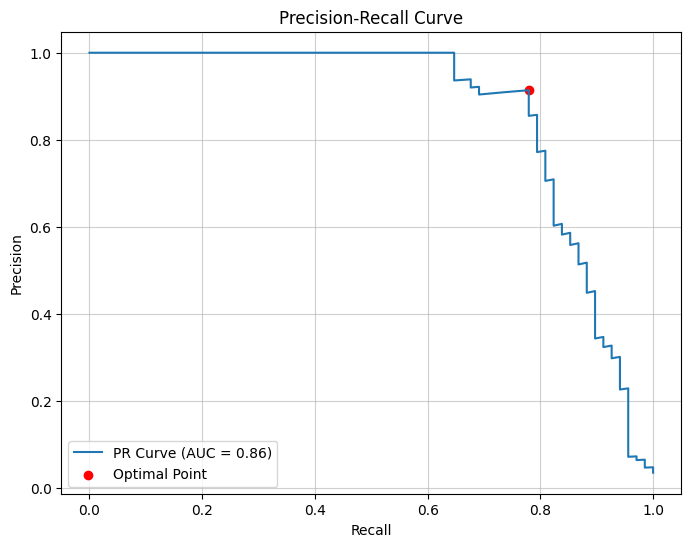

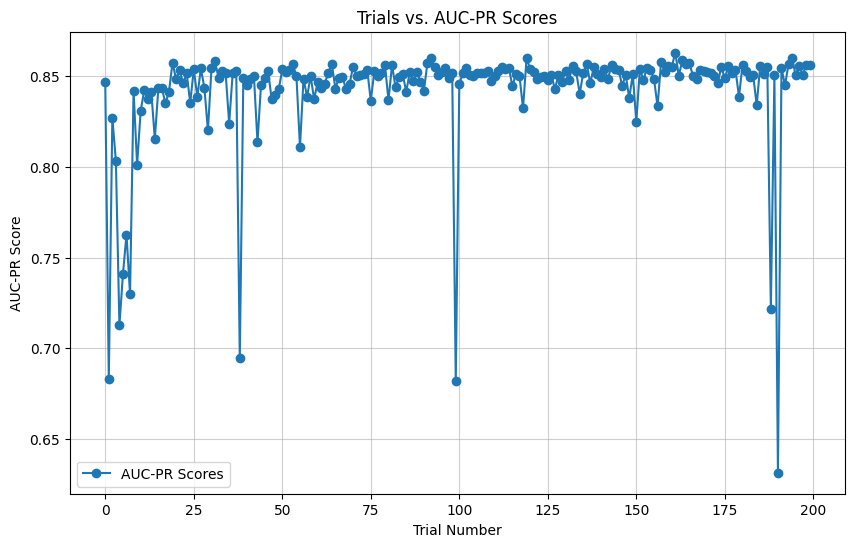

In [151]:


def optimize_model(trial):
    # Suggest hyperparameters for XGBoost
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 0.1, 0.3)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.2, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 8)
    
    # Define the pipeline
    pipeline = ImbPipeline(steps=[
        ('classifier', xgb.XGBClassifier(
            objective='binary:logistic',
            scale_pos_weight=scale_pos_weight,
            learning_rate=learning_rate,
            max_depth=max_depth,
            eval_metric='aucpr',
            random_state=42
        ))
    ])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Compute Precision-Recall Curve and AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    
    return auc_pr  # Return AUC-PR as the optimization objective

# Create and run the Optuna study
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)

#study = optuna.create_study(direction='maximize')  # We aim to maximize AUC-PR
study.optimize(optimize_model, n_trials=200)

# Display the best parameters and the corresponding AUC-PR score
print(f"Best parameters: {study.best_params}")
print(f"Best AUC-PR: {study.best_value:.4f}")

# Use the best parameters to evaluate the model with PR curve
best_params = study.best_params
final_results = evaluate_model_with_pr_curve(
    scale_pos_weight=best_params['scale_pos_weight'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

# Extract trial numbers and AUC-PR scores
trial_numbers = [trial.number for trial in study.trials]
auc_pr_scores = [trial.value for trial in study.trials]

# Plot the trials vs. AUC-PR scores
plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, auc_pr_scores, marker='o', linestyle='-', label='AUC-PR Scores')
plt.xlabel('Trial Number')
plt.ylabel('AUC-PR Score')
plt.title('Trials vs. AUC-PR Scores')
plt.grid(alpha=0.6)
plt.legend()
plt.show()





[I 2024-12-12 00:03:51,043] A new study created in memory with name: no-name-c64f7fee-75f8-4459-b8eb-d5ad0f8a7852
[I 2024-12-12 00:03:51,240] Trial 0 finished with value: 0.8428055329904516 and parameters: {'scale_pos_weight': 0.1749080237694725, 'learning_rate': 0.2536999076681772, 'max_depth': 6}. Best is trial 0 with value: 0.8428055329904516.
[I 2024-12-12 00:03:51,305] Trial 1 finished with value: 0.5610504485899004 and parameters: {'scale_pos_weight': 0.2197316968394073, 'learning_rate': 0.01700037298921102, 'max_depth': 2}. Best is trial 0 with value: 0.8428055329904516.
[I 2024-12-12 00:03:51,410] Trial 2 finished with value: 0.8319118127339353 and parameters: {'scale_pos_weight': 0.1116167224336399, 'learning_rate': 0.19030368381735815, 'max_depth': 5}. Best is trial 0 with value: 0.8428055329904516.
[I 2024-12-12 00:03:51,540] Trial 3 finished with value: 0.8008901055334147 and parameters: {'scale_pos_weight': 0.2416145155592091, 'learning_rate': 0.010725209743171996, 'max_de

Best parameters: {'scale_pos_weight': 0.29545994116909735, 'learning_rate': 0.16897401359706493, 'max_depth': 4}
Best AUC-PR: 0.8622
Optimal Precision: 0.8983050847457628
Optimal Recall: 0.7794117647058824
Optimal Threshold: 0.16475406289100647
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.90      0.78      0.83        68

    accuracy                           0.99      2000
   macro avg       0.95      0.89      0.91      2000
weighted avg       0.99      0.99      0.99      2000

AUC-PR: 0.86


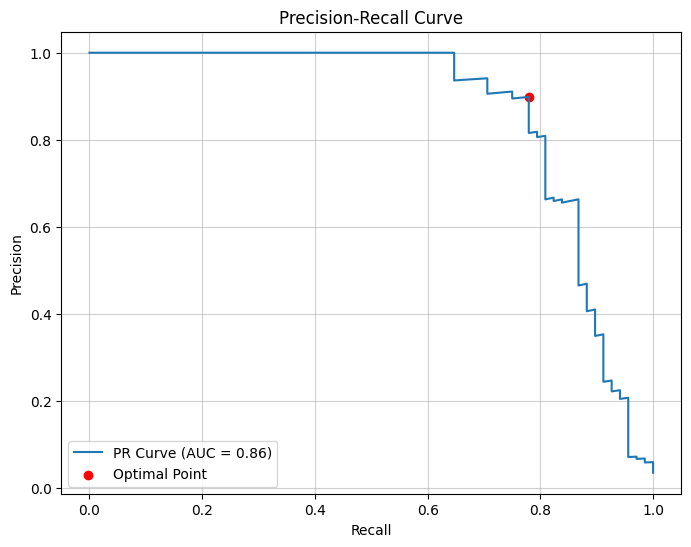

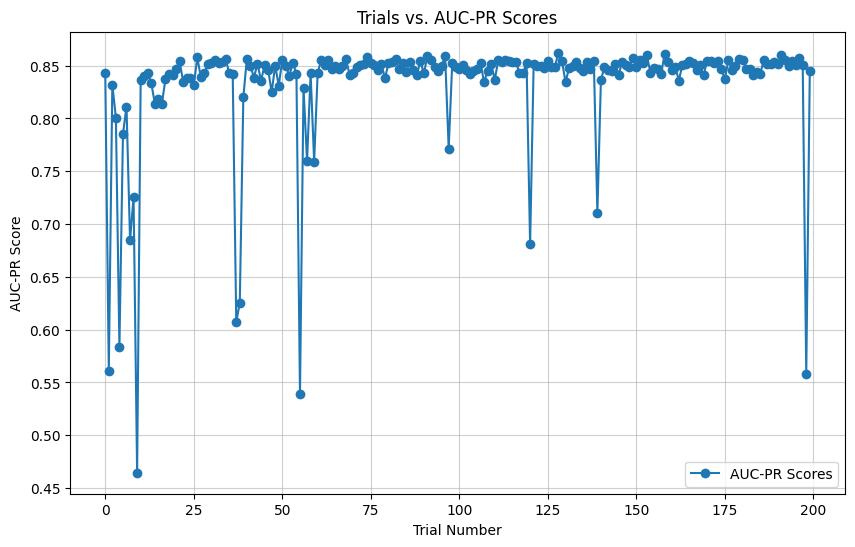

Final AUC-PR: 0.8622
Optimal Precision: 0.8983050847457628
Optimal Recall: 0.7794117647058824
Optimal Threshold: 0.16475406289100647


In [153]:


def optimize_model(trial):
    # Suggest hyperparameters for XGBoost
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 0.1, 0.3)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    max_depth = trial.suggest_int('max_depth', 1, 8)
    
    # Define the pipeline
    pipeline = ImbPipeline(steps=[
        ('classifier', xgb.XGBClassifier(
            objective='binary:logistic',
            scale_pos_weight=scale_pos_weight,
            learning_rate=learning_rate,
            max_depth=max_depth,
            eval_metric='aucpr',
            random_state=42
        ))
    ])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Compute Precision-Recall Curve and AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    
    return auc_pr  # Return AUC-PR as the optimization objective

# Create and run the Optuna study
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)

#study = optuna.create_study(direction='maximize')  # We aim to maximize AUC-PR
study.optimize(optimize_model, n_trials=200)

# Display the best parameters and the corresponding AUC-PR score
print(f"Best parameters: {study.best_params}")
print(f"Best AUC-PR: {study.best_value:.4f}")

# Use the best parameters to evaluate the model with PR curve
best_params = study.best_params
final_results = evaluate_model_with_pr_curve(
    scale_pos_weight=best_params['scale_pos_weight'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

# Extract trial numbers and AUC-PR scores
trial_numbers = [trial.number for trial in study.trials]
auc_pr_scores = [trial.value for trial in study.trials]

# Plot the trials vs. AUC-PR scores
plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, auc_pr_scores, marker='o', linestyle='-', label='AUC-PR Scores')
plt.xlabel('Trial Number')
plt.ylabel('AUC-PR Score')
plt.title('Trials vs. AUC-PR Scores')
plt.grid(alpha=0.6)
plt.legend()
plt.show()

# Print final results
print(f"Final AUC-PR: {final_results['auc_pr']:.4f}")
print(f"Optimal Precision: {final_results['optimal_precision']}")
print(f"Optimal Recall: {final_results['optimal_recall']}")
print(f"Optimal Threshold: {final_results['optimal_threshold']}")


[I 2024-12-12 00:04:41,831] A new study created in memory with name: no-name-63df3c6a-3115-4d47-9cba-f140e38223dc
[I 2024-12-12 00:04:41,998] Trial 0 finished with value: 0.8422951279124307 and parameters: {'scale_pos_weight': 0.1749080237694725, 'learning_rate': 0.2536999076681772, 'max_depth': 38}. Best is trial 0 with value: 0.8422951279124307.
[I 2024-12-12 00:04:42,122] Trial 1 finished with value: 0.8161401540501371 and parameters: {'scale_pos_weight': 0.2197316968394073, 'learning_rate': 0.01700037298921102, 'max_depth': 10}. Best is trial 0 with value: 0.8422951279124307.
[I 2024-12-12 00:04:42,249] Trial 2 finished with value: 0.818615562135333 and parameters: {'scale_pos_weight': 0.1116167224336399, 'learning_rate': 0.19030368381735815, 'max_depth': 31}. Best is trial 0 with value: 0.8422951279124307.
[I 2024-12-12 00:04:42,379] Trial 3 finished with value: 0.7927172545086822 and parameters: {'scale_pos_weight': 0.2416145155592091, 'learning_rate': 0.010725209743171996, 'max_

Best parameters: {'scale_pos_weight': 0.26836820529444055, 'learning_rate': 0.20727233215565966, 'max_depth': 4}
Best AUC-PR: 0.8589
Optimal Precision: 0.896551724137931
Optimal Recall: 0.7647058823529411
Optimal Threshold: 0.22900527715682983
Classification Report with Optimal Threshold:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1932
           1       0.90      0.76      0.83        68

    accuracy                           0.99      2000
   macro avg       0.94      0.88      0.91      2000
weighted avg       0.99      0.99      0.99      2000

AUC-PR: 0.86


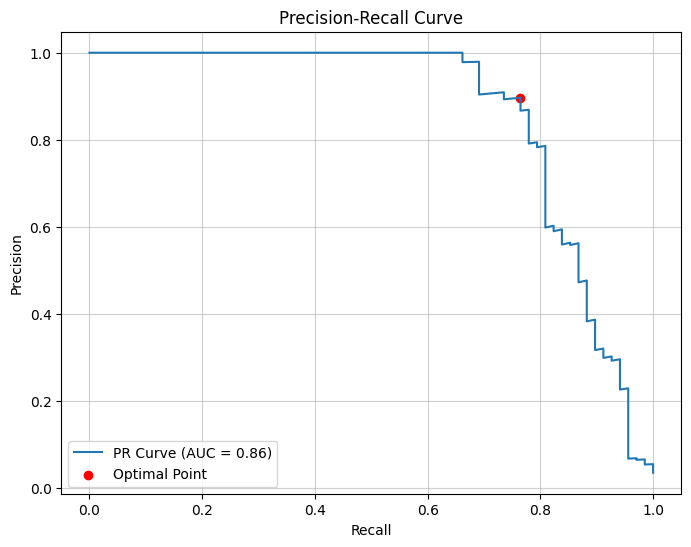

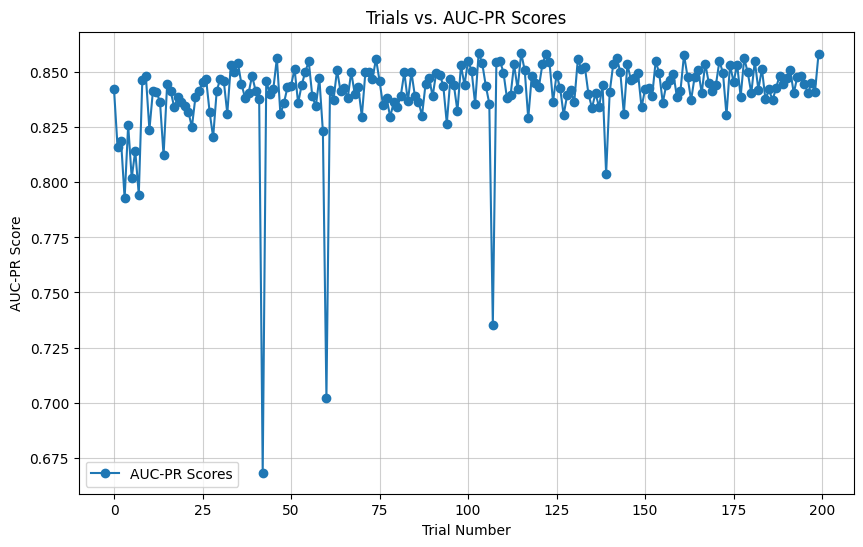

Final AUC-PR: 0.8589
Optimal Precision: 0.896551724137931
Optimal Recall: 0.7647058823529411
Optimal Threshold: 0.22900527715682983


In [154]:


def optimize_model(trial):
    # Suggest hyperparameters for XGBoost
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 0.1, 0.3)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3, log=True)
    max_depth = trial.suggest_int('max_depth', 3, 50)
    
    # Define the pipeline
    pipeline = ImbPipeline(steps=[
        ('classifier', xgb.XGBClassifier(
            objective='binary:logistic',
            scale_pos_weight=scale_pos_weight,
            learning_rate=learning_rate,
            max_depth=max_depth,
            eval_metric='aucpr',
            random_state=42
        ))
    ])
    
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    
    # Compute Precision-Recall Curve and AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    auc_pr = auc(recall, precision)
    
    return auc_pr  # Return AUC-PR as the optimization objective

# Create and run the Optuna study
sampler = optuna.samplers.TPESampler(seed=42)
study = optuna.create_study(direction='maximize', sampler=sampler)

#study = optuna.create_study(direction='maximize')  # We aim to maximize AUC-PR
study.optimize(optimize_model, n_trials=200)

# Display the best parameters and the corresponding AUC-PR score
print(f"Best parameters: {study.best_params}")
print(f"Best AUC-PR: {study.best_value:.4f}")

# Use the best parameters to evaluate the model with PR curve
best_params = study.best_params
final_results = evaluate_model_with_pr_curve(
    scale_pos_weight=best_params['scale_pos_weight'],
    learning_rate=best_params['learning_rate'],
    max_depth=best_params['max_depth'],
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test
)

# Extract trial numbers and AUC-PR scores
trial_numbers = [trial.number for trial in study.trials]
auc_pr_scores = [trial.value for trial in study.trials]

# Plot the trials vs. AUC-PR scores
plt.figure(figsize=(10, 6))
plt.plot(trial_numbers, auc_pr_scores, marker='o', linestyle='-', label='AUC-PR Scores')
plt.xlabel('Trial Number')
plt.ylabel('AUC-PR Score')
plt.title('Trials vs. AUC-PR Scores')
plt.grid(alpha=0.6)
plt.legend()
plt.show()

# Print final results
print(f"Final AUC-PR: {final_results['auc_pr']:.4f}")
print(f"Optimal Precision: {final_results['optimal_precision']}")
print(f"Optimal Recall: {final_results['optimal_recall']}")
print(f"Optimal Threshold: {final_results['optimal_threshold']}")


### Report Classification